<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Neural_Gas_turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install tensorflow

In [17]:
pip install keras-tuner

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings('ignore')

In [19]:
gas_turbines = pd.read_csv('//content/gas_turbines.csv')
gas_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [20]:
gas_turbines.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [21]:
gas_turbines.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [22]:
gas_turbines.shape

(15039, 11)

In [23]:
gas_turbines.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [24]:
gas_turbines.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [25]:
gas_turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [26]:
gas_turbines.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [27]:
gas_turbines.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

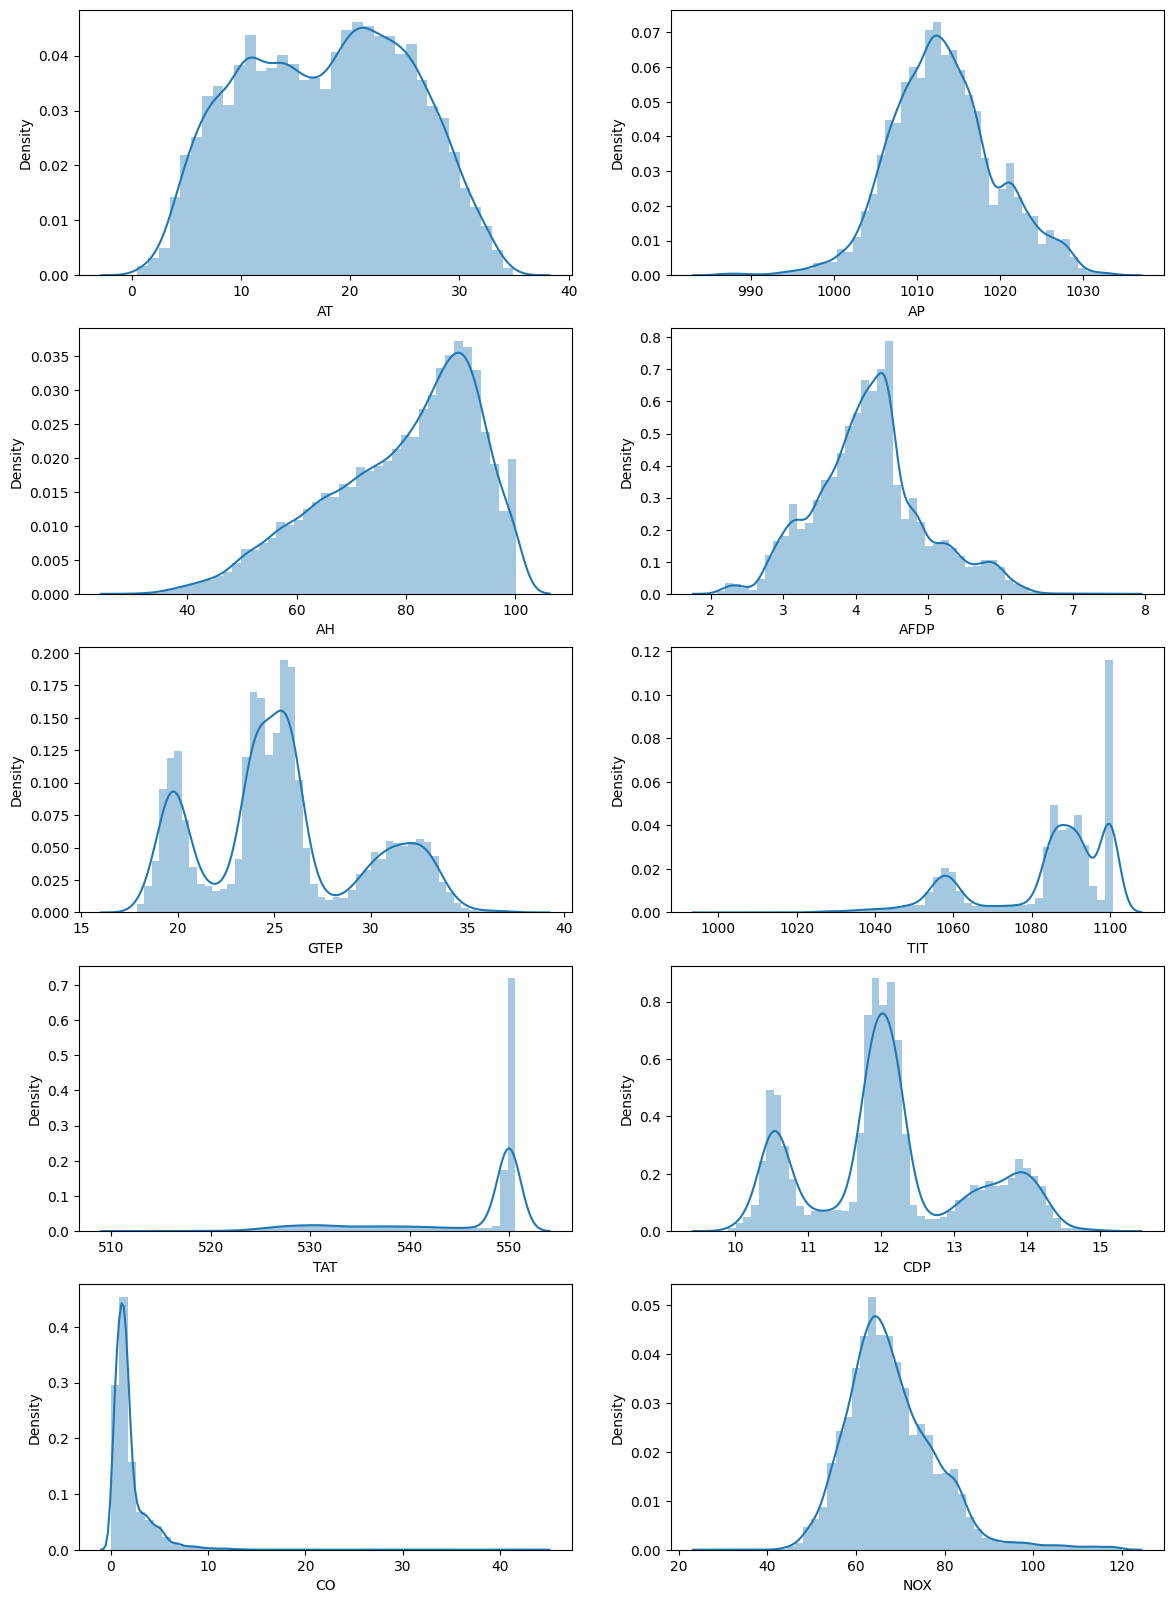

In [28]:
fig, ax = plt.subplots(5,2, figsize = (14,20))

sns.distplot(gas_turbines.AT, ax = ax[0,0])
sns.distplot(gas_turbines.AP, ax = ax[0,1])
sns.distplot(gas_turbines.AH, ax = ax[1,0])
sns.distplot(gas_turbines.AFDP, ax = ax[1,1])
sns.distplot(gas_turbines.GTEP, ax = ax[2,0])
sns.distplot(gas_turbines.TIT, ax = ax[2,1])
sns.distplot(gas_turbines.TAT, ax = ax[3,0])
sns.distplot(gas_turbines.CDP, ax = ax[3,1])
sns.distplot(gas_turbines.CO, ax = ax[4,0])
sns.distplot(gas_turbines.NOX, ax = ax[4,1])

plt.show()

In [29]:
numerical_features = gas_turbines.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [30]:
# Detect observations with more than one outlier

def outlier_hunt(gas_turbines):
    """
    Takes a dataframe gas_turbines of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    for col in gas_turbines.columns.tolist():         # iterate over features(columns)
        Q1 = np.percentile(gas_turbines[col],25)      # 1st quartile (25%)
        Q3 = np.percentile(gas_turbines[col],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)

        outlier_step = 1.5 * IQR            # outlier step

        # Determine a list of indices of outliers for feature col
        outlier_list_col = gas_turbines[(gas_turbines[col] < Q1 - outlier_step) | (gas_turbines[col] > Q3 + outlier_step )].index

        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(gas_turbines[numerical_features]))))

The dataset contains 1543 observations with more than 2 outliers


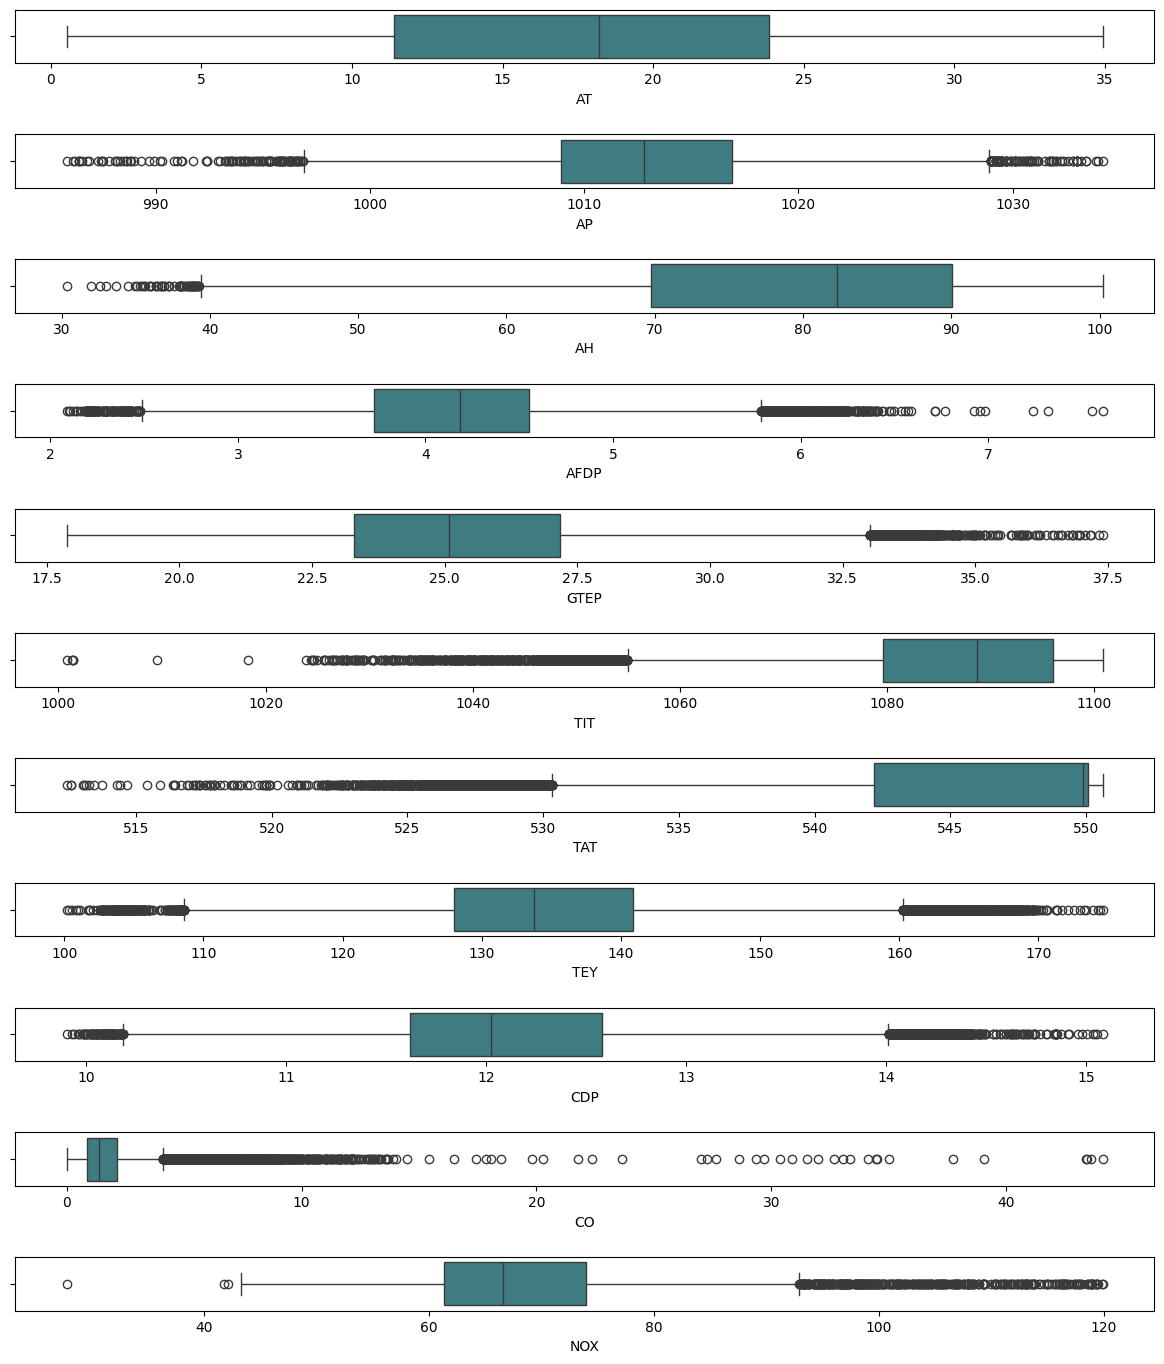

In [31]:
outlier = gas_turbines.copy()
fig, axes=plt.subplots(11,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='AT',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data= outlier,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data= outlier,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data= outlier,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data= outlier,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data= outlier,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data= outlier,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data= outlier,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data= outlier,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data= outlier,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

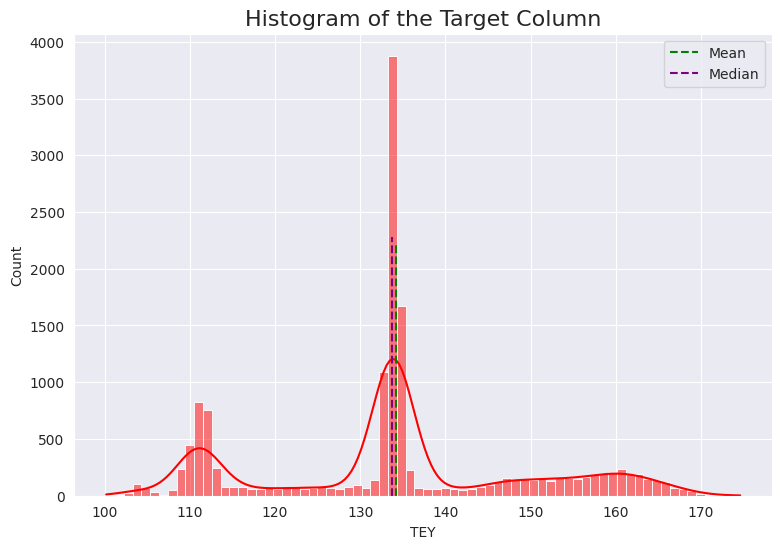

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
sns.histplot(data= gas_turbines, x= "TEY", color= "red", kde= True)
plt.axvline(x=gas_turbines["TEY"].mean(), ymax= 0.55, color= "green", linestyle= '--', label= "Mean")
plt.axvline(x=gas_turbines["TEY"].median(), ymax= 0.56, color= "purple", linestyle= '--',label= "Median")
plt.title("Histogram of the Target Column", fontsize=16)
plt.legend();

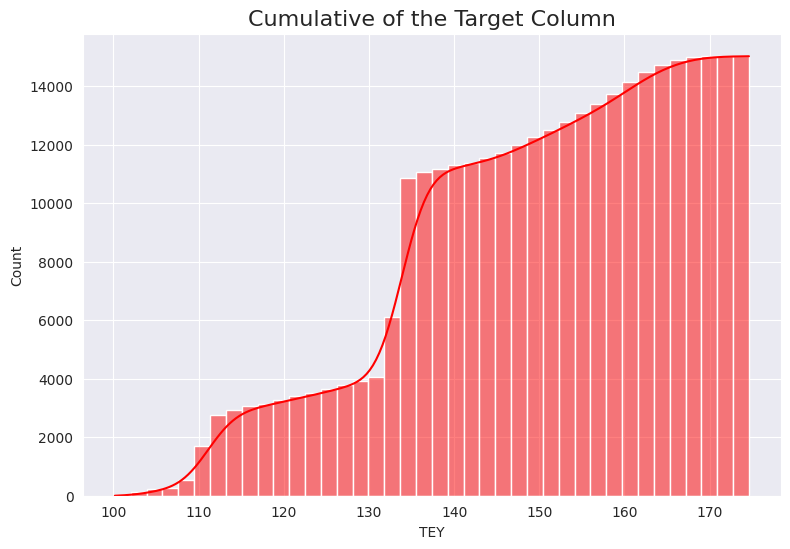

In [33]:
plt.figure(figsize = (9,6))
sns.histplot(gas_turbines["TEY"], kde= True, bins= 40, color= "red", cumulative= True)
plt.title("Cumulative of the Target Column", fontsize=16);

In [34]:
gas_turbines.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [35]:
x = gas_turbines.drop('TEY', axis=1)
y = gas_turbines[["TEY"]]


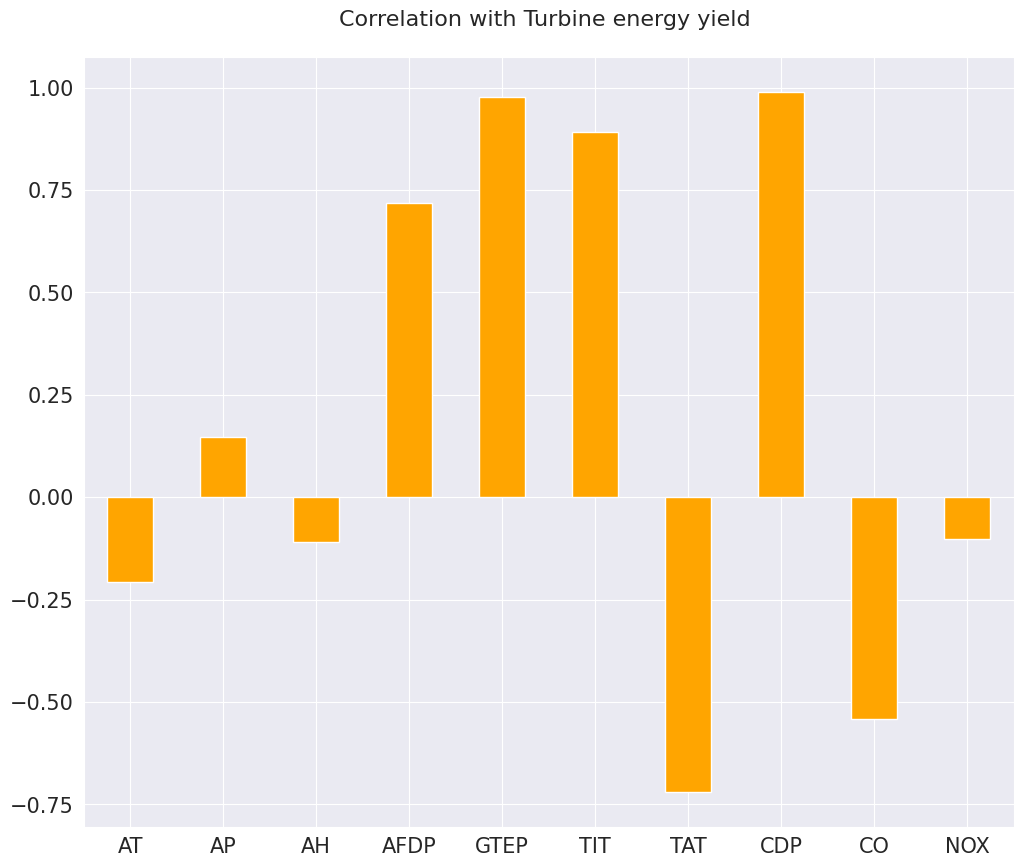

In [36]:
data2 = gas_turbines.copy()

correlations = data2.corrwith(gas_turbines.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize=(12,10), fontsize = 15, color = 'orange', rot = 0, grid = True)
plt.title('Correlation with Turbine energy yield \n', fontsize = "16", fontfamily = "sans-serif")
plt.show()

In [37]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression

In [38]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [39]:
scores = fit.scores_
features = fit.transform(x)

In [40]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.715198,CDP
4,1.600436,GTEP
5,1.324650,TIT
6,0.892913,TAT
3,0.660018,AFDP
8,0.512290,CO
0,0.412726,AT
9,0.300405,NOX
1,0.138390,AP
2,0.097303,AH


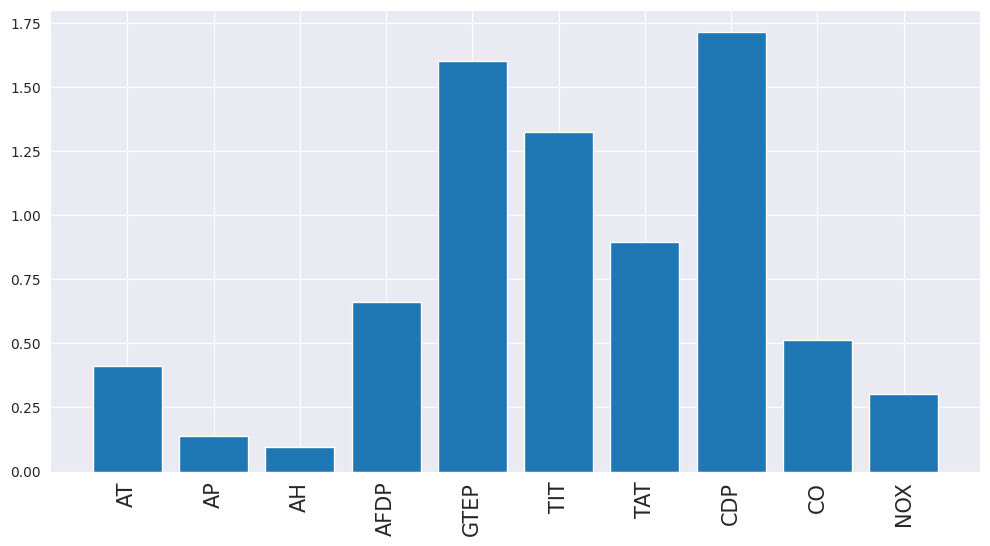

In [41]:
fig, axes = plt.subplots(figsize=(12,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

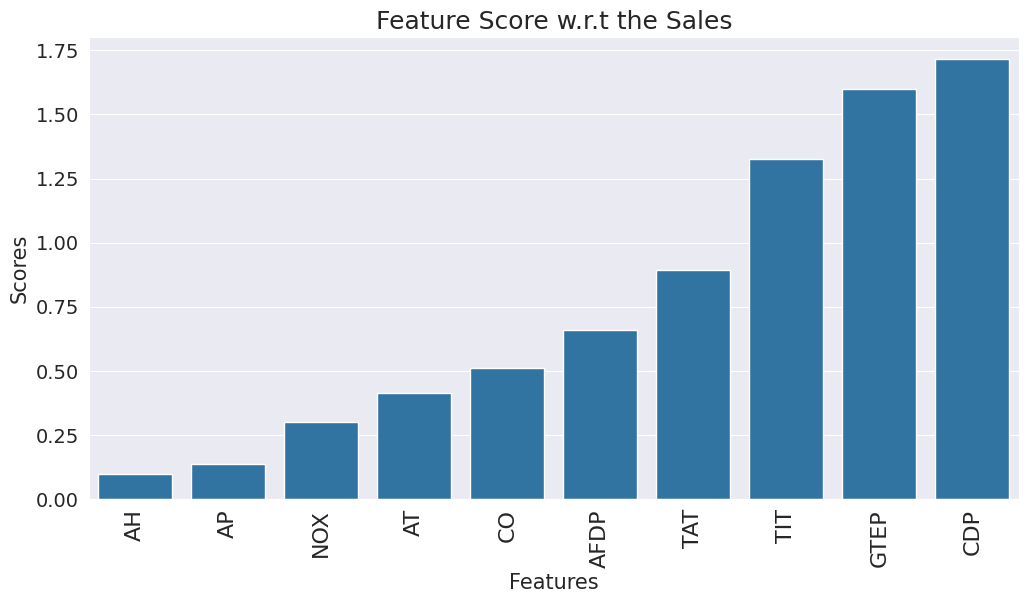

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [43]:
score_df.sort_values('Score', ascending=False)

,Score,Feature
7,1.715198,CDP
4,1.600436,GTEP
5,1.324650,TIT
6,0.892913,TAT
3,0.660018,AFDP
8,0.512290,CO
0,0.412726,AT
9,0.300405,NOX
1,0.138390,AP
2,0.097303,AH


In [44]:
model_data = gas_turbines[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [45]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [46]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [48]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64


In [49]:
print('Standard Devaition','\n',np.round(df_standard_scaled.std(),1))

Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64


In [50]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [52]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units = hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))

    model.add(layers.Dense(1, activation='linear'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model

In [53]:
from keras_tuner.tuners import RandomSearch

In [54]:
tuner = RandomSearch(build_model, objective= 'val_mean_absolute_error', max_trials= 5,
                     executions_per_trial= 3, directory= 'project', project_name= 'Gas Turbine')
tuner.search_space_summary()

Reloading Tuner from project/Gas Turbine/tuner0.json
Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_v

In [55]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

In [56]:
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 4 summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 64
units_3: 96
units_4: 64
units_5: 96
units_6: 96
units_7: 64
units_8: 64
units_9: 64
units_10: 64
units_11: 32
units_12: 32
units_13: 64
units_14: 96
units_15: 32
units_16: 64
units_17: 96
units_18: 64
Score: 0.02358303839961688

Trial 2 summary
Hyperparameters:
num_layers: 19
units_0: 96
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 96
units_4: 96
units_5: 96
units_6: 64
units_7: 64
units_8: 32
units_9: 96
units_10: 96
units_11: 64
units_12: 32
units_13: 96
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
Score: 0.023720695326725643

Trial 1 summary
Hyperparameters:
num_layers: 10
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 64
units_3: 32
units_4: 96
units_5: 96
units_6: 32
units_7: 32
units_8: 96
units_9: 96
units_10: 9

In [57]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model1

In [58]:
pip install --upgrade tensorflow


In [59]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))

    adam = Adam(lr=0.001)
    model3.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model3

In [60]:
# model3 = KerasRegressor(build_fn=create_model, batch_size=40,epochs=200,verbose=0)
# activation_function = ['softmax','tanh','relu']
# init = ['normal','uniform','zero']
# param_grid = dict(activation_function= activation_function, init= init)
# grid3 = GridSearchCV(estimator= model3, param_grid= param_grid, cv= KFold(), verbose=10)

NameError: name 'KerasRegressor' is not defined

In [ ]:
# grid_result3 = grid3.fit(x_test,y_test)

In [ ]:
# print('Best {}, using {}'.format(grid_result3.best_score_, grid_result3.best_params_))
# means = grid_result3.cv_results_["mean_test_score"]
# stds  = grid_result3.cv_results_["std_test_score"]
# params = grid_result3.cv_results_["params"]
# for mean,stdev,param in zip(means, stds, params):
#     print("{}, {} with {}".format(mean, stdev, param))

In [61]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [62]:
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test)   # scaling test data -- predictor

print("x_train_scaled :", x_train_scaled.shape)
print("x_test_scaled  :",x_test_scaled.shape)
print("y_train        :",y_train.shape)
print("y_test         :",y_test.shape)

x_train_scaled : (12031, 7)
x_test_scaled  : (3008, 7)
y_train        : (12031, 1)
y_test         : (3008, 1)


In [63]:
model = Sequential()
model.add( Dense(units= 50, activation= 'relu', kernel_initializer= 'normal', input_dim= 7)) # input layer
model.add( Dense(units= 20, activation= 'tanh', kernel_initializer= 'normal')) # hidden layer
model.add( Dense(units= 1, kernel_initializer= 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss= "mse", metrics= ["mae", "mse"])
history = model.fit(x_train_scaled, y_train, batch_size= 50, validation_split= 0.3, epochs=10,  verbose=1)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 18056.7715 - mae: 133.4262 - mse: 18056.7715 - val_loss: 16814.1055 - val_mae: 128.7095 - val_mse: 16814.1055
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16637.2559 - mae: 127.9919 - mse: 16637.2559 - val_loss: 15772.2764 - val_mae: 124.5965 - val_mse: 15772.2764
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 15616.5557 - mae: 123.9468 - mse: 15616.5557 - val_loss: 14856.7080 - val_mae: 120.8665 - val_mse: 14856.7080
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14691.6309 - mae: 120.1567 - mse: 14691.6309 - val_loss: 14005.5254 - val_mae: 117.2926 - val_mse: 14005.5254
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 13866.8662 - mae: 116.6758 - mse: 13866.8662 - val_loss: 13202.2031 - val_mae: 113.8166 - val_mse: 13202.2031
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13016.1465 - mae: 112.9588 - mse: 13016.1465 - val_loss: 12438.3525 - val_mae: 110.4100 - 

In [66]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
    # Defining list of hyperparameters
    batch_size_list = [10, 15, 20]
    epoch_list = [10, 50, 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            # Store results in a DataFrame
            result_df = pd.DataFrame({'batchsize': [batch_trial], 'epochs': [epochs_trial], 'Accuracy': [100 - MAPE]})
            bestParamTable = pd.concat([bestParamTable, result_df], ignore_index=True)

            # Printing the results of the current iteration
            print('batch_size:', batch_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', 100 - MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: 98.18204861260533
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: 99.65927658364245
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: 99.641545043299
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 15 - epochs: 10 Accuracy: 89.82528187902042
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 15 - epochs: 50 Accuracy: 99.62644036039931
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 15 - epochs: 100 Accuracy: 99.63250756805432
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 20 - epochs: 10 Accuracy: 80.9739293149322
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 20 - epochs: 50 Accuracy: 99.65964303035227
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 20 - epochs: 100 Accuracy: 99.62411575058525


In [67]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train_scaled,y_train, batch_size= 20, epochs= 10, verbose= 0)

In [68]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,127.109215
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,127.109215
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,127.109215
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,127.109215
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,127.109215
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,127.109215
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,127.109215
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,127.109215
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,127.109215
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,127.109215


In [69]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis= 1 , inplace= True)

In [70]:
# Computing the absolute percent error
APE = 100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %'] = APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  89.69639485763788


,Actual,Predicted,APE %
13312,134.46,127.109215,5.466894
12627,111.88,127.109215,13.612098
6393,133.72,127.109215,4.943752
4990,133.79,127.109215,4.993486
12462,110.77,127.109215,14.750578


In [71]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,127.109215,5.466894,0.054669
1,111.88,127.109215,13.612098,-0.136121
2,133.72,127.109215,4.943752,0.049438
3,133.79,127.109215,4.993486,0.049935
4,110.77,127.109215,14.750578,-0.147506
...,...,...,...,...
3003,119.25,127.109215,6.590537,-0.065905
3004,133.74,127.109215,4.957967,0.049580
3005,146.31,127.109215,13.123358,0.131234
3006,150.07,127.109215,15.300050,0.153001


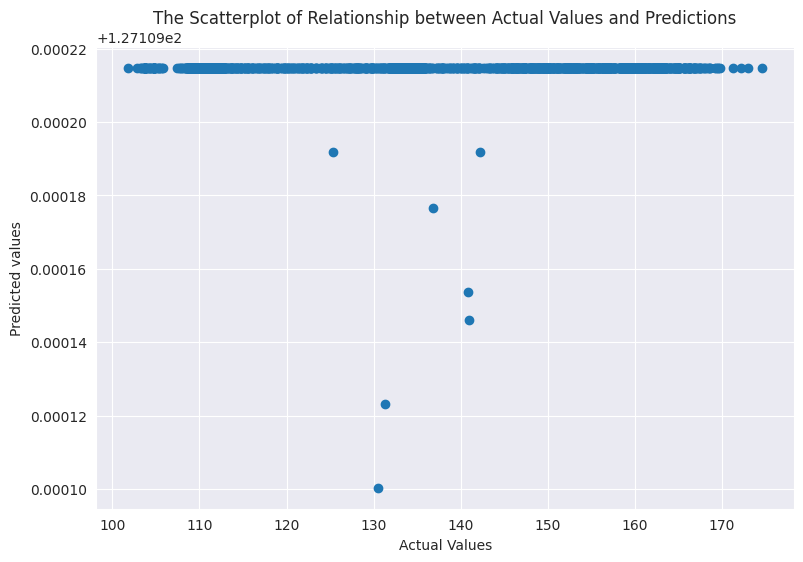

In [72]:
plt.figure(figsize=(9,6))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [73]:
from sklearn import metrics
print("MAE  :",metrics.mean_absolute_error(y_test,y_predict_test))
print("MSE  :",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE  : 14.095277942799505
MSE  : 297.24051340522163
RMSE : 17.240664529107388


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train) : ',r2_score(y_train, y_predict_train))
print('R2_score (test)  : ',r2_score(y_test, y_predict_test))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R2_score (train) :  -0.203317529994814
R2_score (test)  :  -0.18711197416892023


In [75]:
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % -0.0 of the target correctly


<Axes: ylabel='Density'>

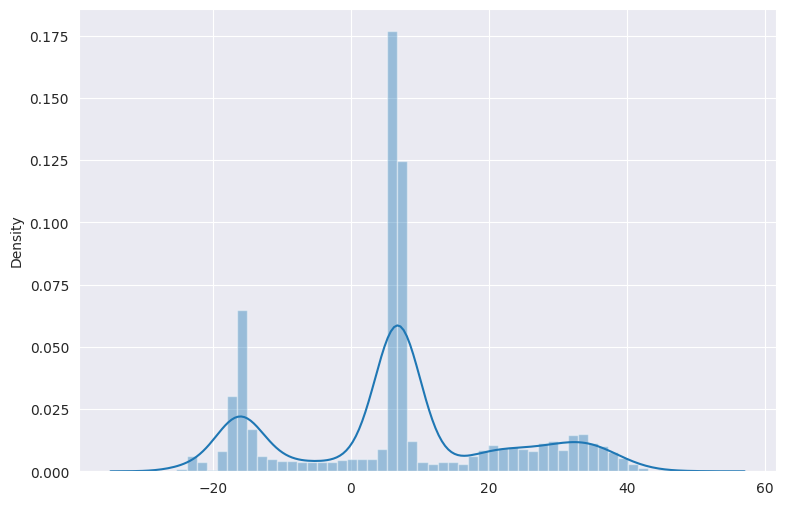

In [76]:
# Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(9,6))
sns.distplot(y_test-y_predict_test,bins=50) # this figure also proves that our model fits very good

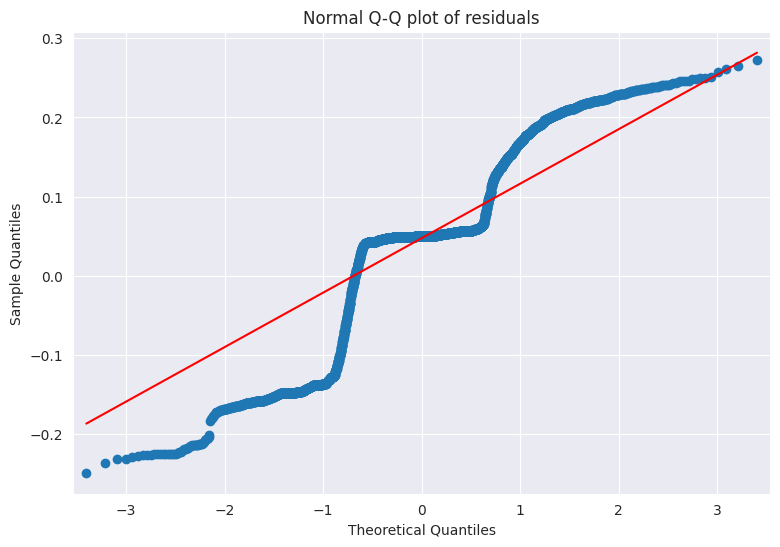

In [78]:
import statsmodels.api as smf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
smf.qqplot(predictions_df['Error'], line= 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()